Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [111]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [112]:
#displaying all the columns in the dataset
pd. set_option("display.max_columns", None)

#displaying all the rows in the dataset
pd.set_option("display.max_rows",None)

In [113]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [114]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

Initial observations

1.The dataset has 21 columns

2.Both numerical and catagorical data are present in the dataset.

3.We can observe many columns having object(string) value in the dataset

4.Based on all the features we have to predict the costumer churn of a telecom company.

# Exploratory Data Analysis(EDA)

In [115]:
#finding number of rows and columns
data.shape

(7043, 21)

The dataset has 7043 rows and 21 columns

In [116]:

#finding the null values in each column
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values are present in the dataset, lets recheck our findings by plotting a heatmap plot.

<AxesSubplot:>

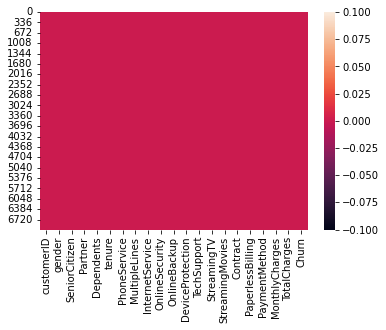

In [117]:
#checking for null values using a heatmap
sns.heatmap(data.isna())

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Most of the columns in the dataset are having object datatype values. We need to encode the object values into numbers for better analysis.

In [119]:
#lets check if the column were renamed.
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

observations from the statistics of the data

1.Senior citizen is a catagorical column. So its min value is zero and max value is one.

2.The difference between the mean and standard deviation in tenure does not appear to be good. It is may be because of the variation in Tenure column. Also the min value of tenure is zero.Apart from that the difference between all the quantiles in Tenure appears to be good.

3.The difference between mean and standard deviation in MonthlyCharges does not appears to be good enough standard deviation is nearly 50% of the mean.And also the difference between all the quantiles is not good enough.

4.rest all the columns have object data so only three columns are printed after using describe() method.

In [121]:
# lets check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
customerID                 7043
gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                       73
PhoneService                  2
MultipleLines                 3
InternetService               3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtection              3
TechSupport                   3
StreamingTV                   3
StreamingMovies               3
Contract                      3
PaperlessBilling              2
PaymentMethod                 4
MonthlyCharges             1585
TotalCharges               6531
Churn                         2

We have found out the number of unique values in each column , now lets find out the type of catagorical values in each column for selecting the proper encoding technique.

In [122]:
#deleting customerID from the dataset
data=data.drop(['customerID'],axis=1)

Lets split the dataset into numerical and catagorical columns for better analysis


In [123]:
# now lets check for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [124]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


The dataset has 3 numerical and 18 catagorical columns.
TotalCharges column appears to haev numerical values but its datatype is showing as object, lets analyse this.

In [125]:
#converting the TotalCharges column into numeric 
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have observed some null values in the TotalCharges columns lets impute the null values by taking the mean.

In [126]:
# filling missing values in TotalCharges using mean
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [127]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [128]:
data.shape


(7043, 20)

In [129]:
#Lets check the Info about the data after filling the null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges column is successfully converted into float datatype.lets cross check it again by printing the catagorical columns.

In [130]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [131]:
# lets check the value counts of each variable in each catagorical column
for d in data[categorical_col].columns:
        print(data[d].value_counts())
        print('-'*200)

Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Lets plot the value counts of each feature using Countplots

In [132]:
def value_counts(column):
    counts=len(data[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)    
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data)
    plt.show()
    print("*"*200)


Male      3555
Female    3488
Name: gender, dtype: int64


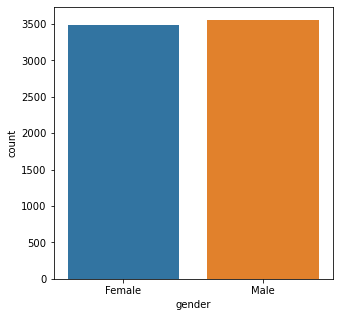

********************************************************************************************************************************************************************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


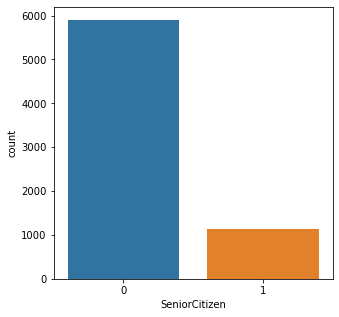

********************************************************************************************************************************************************************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64


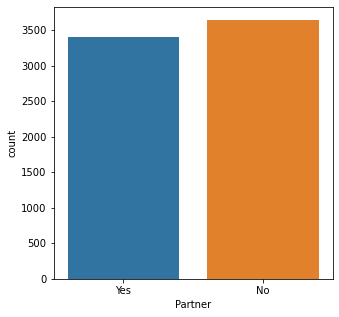

********************************************************************************************************************************************************************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64


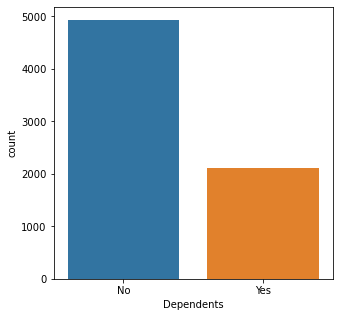

********************************************************************************************************************************************************************************************************
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
64     80
56     80
52     80
26     79
25     79
61     76
14     76
65     76
60     76
46     74
19     73
29     72
27     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
47     68
51     68
54     68
58     67
49     66
57     65
31     65
43     65
37     65
42     65
34     65
33     64
55     64
48     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64


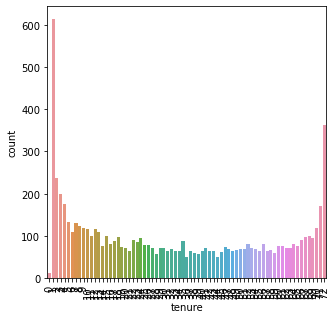

********************************************************************************************************************************************************************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64


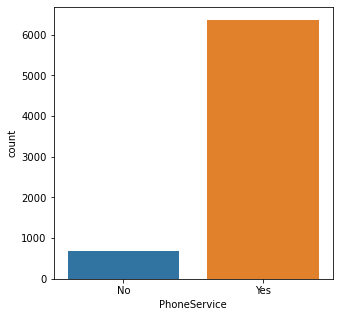

********************************************************************************************************************************************************************************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


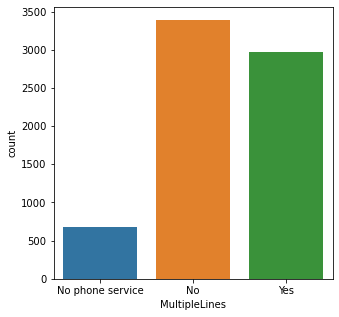

********************************************************************************************************************************************************************************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


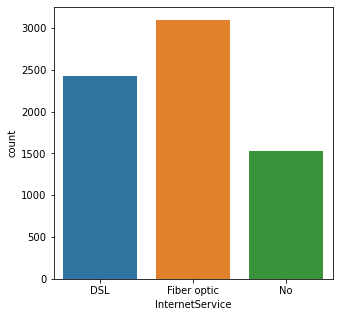

********************************************************************************************************************************************************************************************************
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


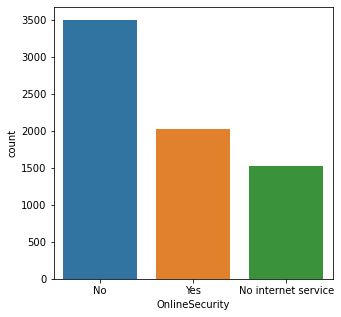

********************************************************************************************************************************************************************************************************
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


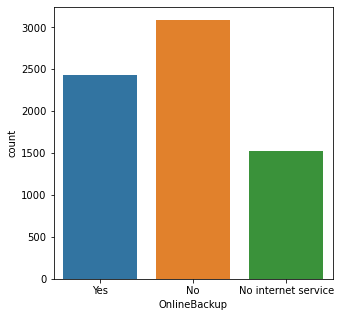

********************************************************************************************************************************************************************************************************
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


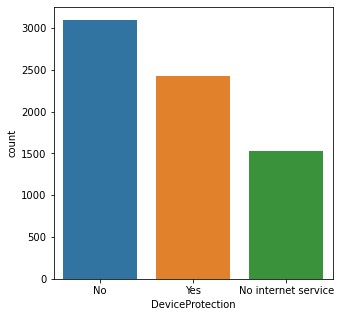

********************************************************************************************************************************************************************************************************
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


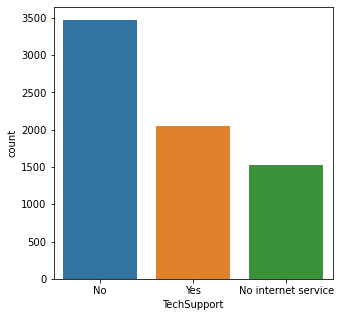

********************************************************************************************************************************************************************************************************
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


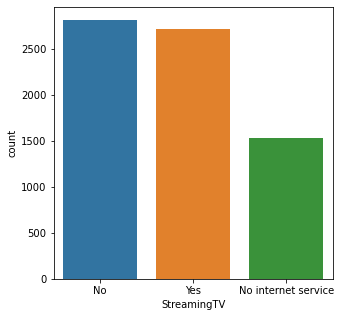

********************************************************************************************************************************************************************************************************
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


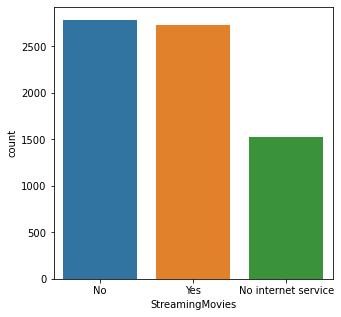

********************************************************************************************************************************************************************************************************
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


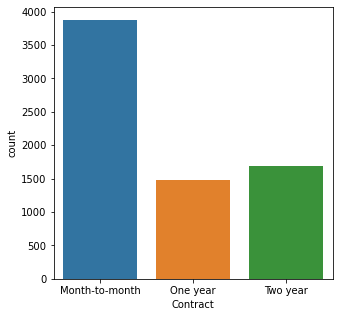

********************************************************************************************************************************************************************************************************
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


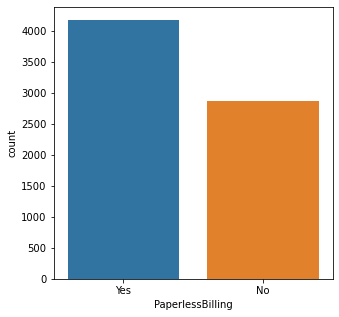

********************************************************************************************************************************************************************************************************
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


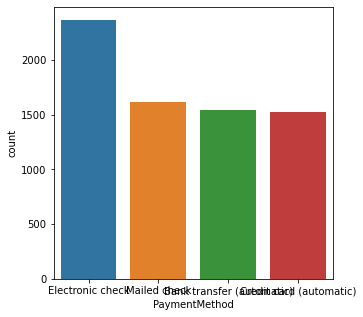

********************************************************************************************************************************************************************************************************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
19.70     43
19.65     43
19.55     40
20.15     40
19.75     39
20.25     39
20.35     38
19.80     38
20.10     37
19.60     37
20.20     35
19.50     32
20.45     31
19.40     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
25.00     17
19.20     17
84.80     17
20.75     17
74.40     16
81.00     15
24.80     15
24.45     15
20.60     15
20.85     15
79.20     14
70.15     14
25.05     14
25.15     14
79.85     14
80.45     14
89.85     13
75.35     13
95.00     13
69.95     13
20.70     13
89.55     13
80.85     13
24.70     12
70.30     12
75.50     12
94.40     12
25.40     12
24.95     12
19.10     12
74.90     12
55.00 

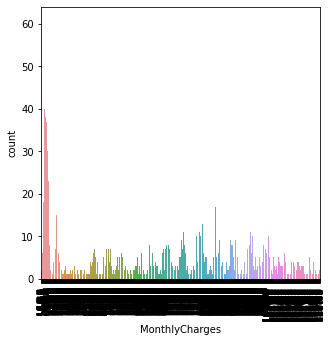

********************************************************************************************************************************************************************************************************


In [133]:
countplots=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
for i in countplots:
    print(countplots[i].value_counts())
    value_counts(i)

Observations from the Countplots
1.The Telecom company has more males customers than female.

2.Most of the telecom companys customers were not senior citezens.

3.Most of the customers of telecom company does not have dependents.

4.Most of the customers have opted for phoneservice.

5.Most people has not taken multiple lines.

6.Most people has taken fibreoptics as internet service.

7.Most peopl have not opted for device protection, online backup and internet security.

8.Most of the people have opted for monthtomonth contact and paperless billings.


Lets Encode the Catagorical columns with Object(string) values with LabelEncoder encoding technique.


In [135]:
print("number of catagorical columns are ", len(categorical_col))

number of catagorical columns are  16


In [136]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [137]:
#encoding the catagorical columns.
data[categorical_col]=data[categorical_col].apply(lab_enc.fit_transform)
data[categorical_col]



gender  Partner  Dependents  PhoneService  MultipleLines  \
0          0        1           0             0              1   
1          1        0           0             1              0   
2          1        0           0             1              0   
3          1        0           0             0              1   
4          0        0           0             1              0   
5          0        0           0             1              2   
6          1        0           1             1              2   
7          0        0           0             0              1   
8          0        1           0             1              2   
9          1        0           1             1              0   
10         1        1           1             1              0   
11         1        0           0             1              0   
12         1        1           0             1              2   
13         1        0           0             1              2   
14         1        0           0             1              0   
15         0        1           1             1              2   
16         0        0           0             1              0   
17         1        0           1             1              2   
18         0        1           1             1              0   
19         0        0           0             1              0   
20         1        0           0             0              1   
21         1        1           0             1              0   
22         1        0           0             1              0   
23         0        1           0             1              2   
24         1        1           1             1              0   
25         0        0           0             1              0   
26         1        1           1             1              2   
27         1        1           1             0              1   
28         1        1           0             1              2   
29         0        0           1             1              0   
30         0        1           0             1              2   
31         1        1           0             1              0   
32         0        1           1             1              0   
33         1        0           0             1              0   
34         1        0           0             1              0   
35         0        1           1             1              2   
36         1        0           0             1              0   
37         0        0           0             1              0   
38         1        0           0             1              2   
39         0        0           0             1              2   
40         1        1           1             1              0   
41         0        1           1             1              2   
42         0        1           1             1              0   
43         0        0           0             1              2   
44         0        1           0             1              2   
45         0        0           0             1              2   
46         1        0           0             1              0   
47         0        0           0             1              0   
48         1        0           0             1              2   
49         0        1           1             1              2   
50         0        0           0             1              2   
51         0        0           0             1              0   
52         0        1           0             1              2   
53         0        1           0             1              2   
54         0        1           1             1              0   
55         1        0           0             1              2   
56         0        1           1             1              2   
57         1        1           1             1              2   
58         0        1           1             1              2   
59         0        0           0             

In [138]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [139]:
data.shape

(7043, 20)

All the catagorical columns are encoded with numerical values now. So lets find out the typre of distribution of each feature.

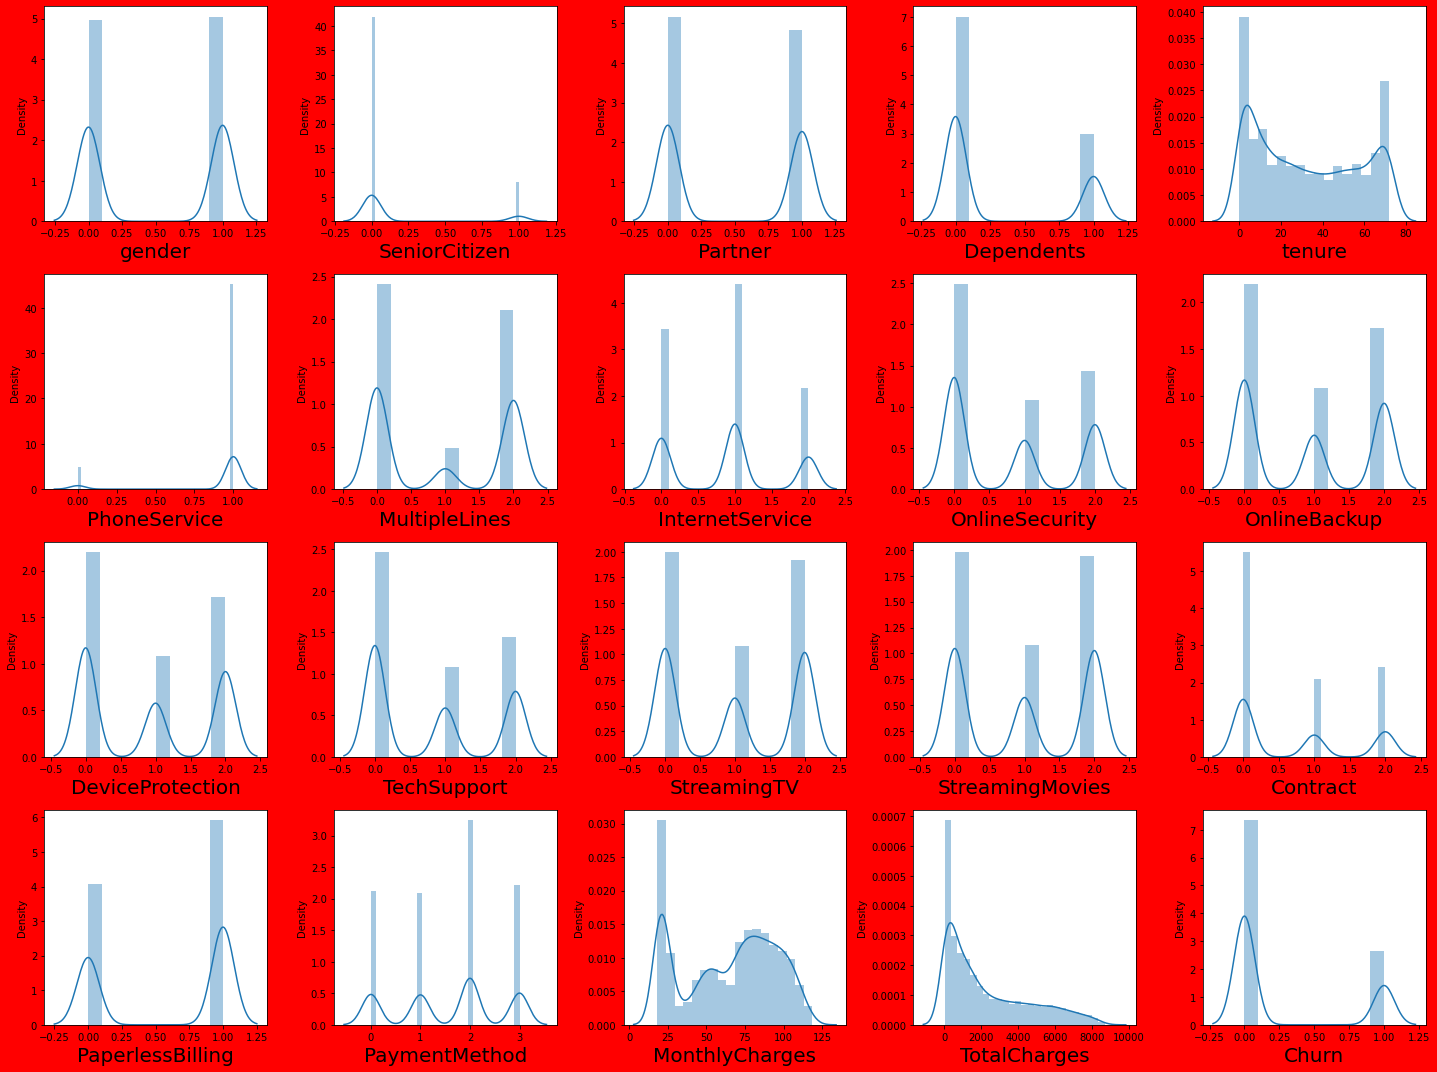

In [140]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations from the dist plot

1.Here Tenure, monthly charges and total charges are columns having continiuos data, so we will only consider their respective plots for analysis.

2.In tenure and Monthly charges the curve does not appears to be having normal distribution(bell shaped Curve).

3.In total charges the curve appears to be normal but it is observed to be having some skewness in the right side.

4.now lets check whether they have outliers in the distribution by plotting box plots.

In [142]:
#checking for outliers in all the features
df_features=data.drop('Churn', axis=1)

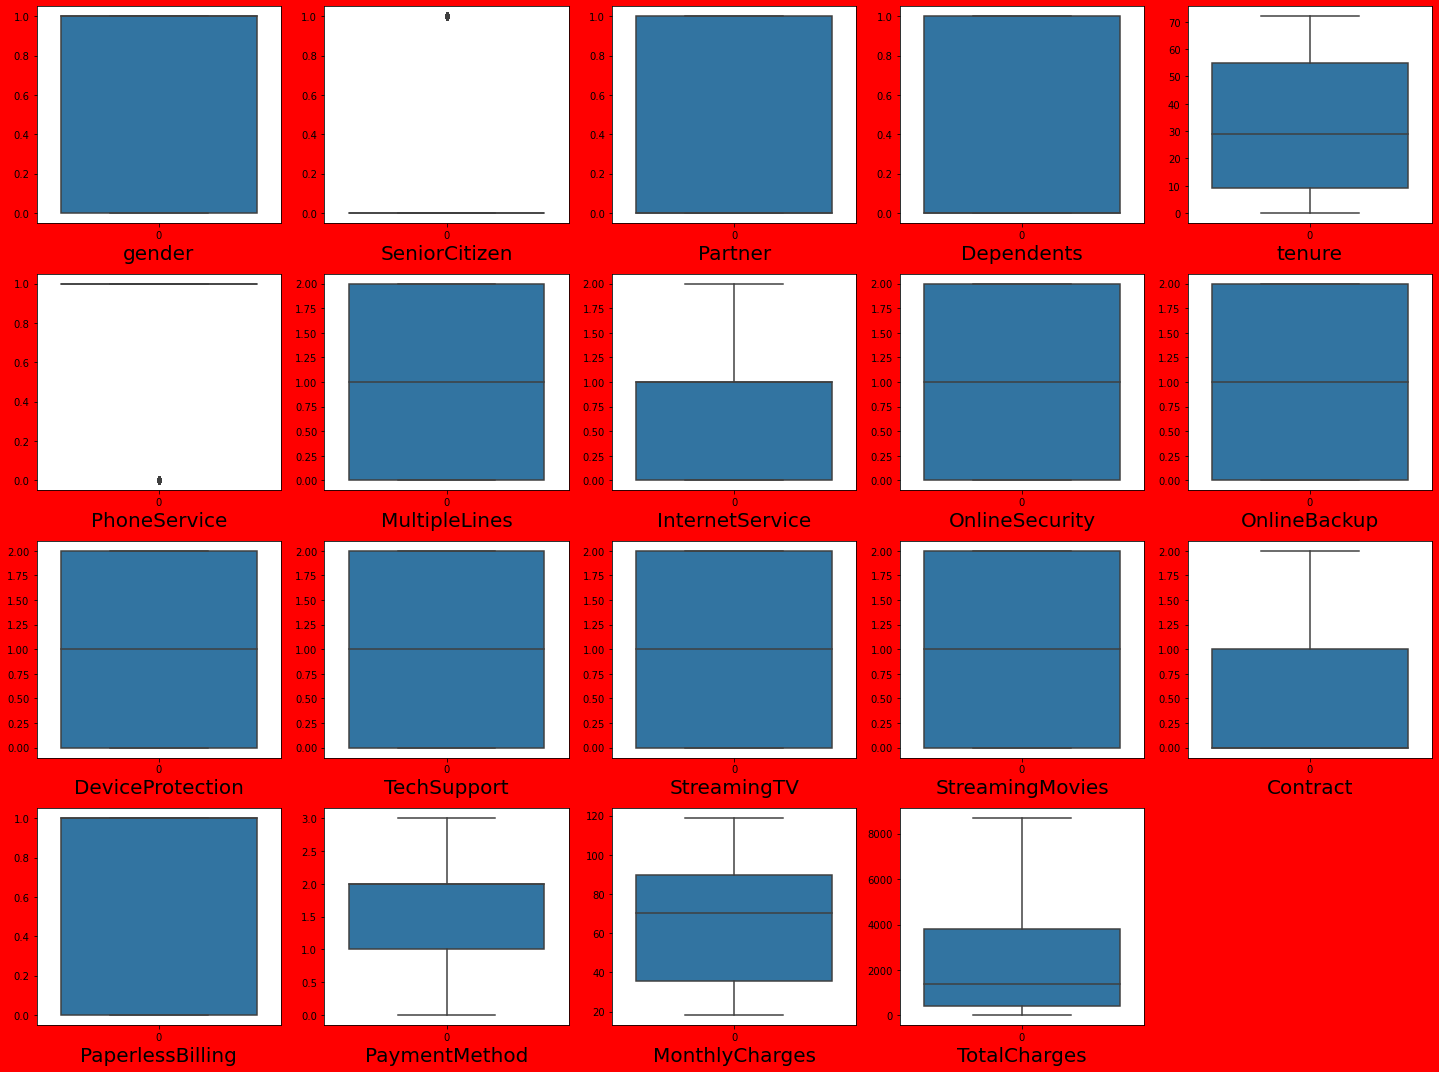

In [143]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=19:
        plt.subplot(4,5,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations

1.Senior citizen ans Phone service columns gave outliers but they are catagorical columns so we will leave the outliers as it is.

In [144]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['Churn']
x=data.drop(columns=['Churn'])

In [146]:
x.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
2                 1              3           53.85        108.15  
3                 0              0           42.30       1840.75  
4                 1              2           70.70        151.65

In [147]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [148]:
#finding the corelation between the features in the data set
data.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   
StreamingTV      -0.006421       0.030776  0.137341    0.046885  0.289373   
StreamingMovies  -0.008743       0.047266  0.129574    0.021321  0.296866   
Contract          0.000126      -0.142554  0.294806    0.243187  0.671607   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
PaymentMethod     0.017352      -0.038551 -0.154798   -0.040292 -0.370436   
MonthlyCharges   -0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges      0.000048       0.102395  0.318812    0.064535  0.824757   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  InternetService  \
gender               -0.006488      -0.006739        -0.000863   
SeniorCitizen         0.008576       0.146185        -0.032310   
Partner               0.017706       0.142410         0.000891   
Dependents           -0.001762      -0.024991         0.044590   
tenure                0.008448       0.343032        -0.030359   
PhoneService          1.000000      -0.020538         0.387436   
MultipleLines        -0.020538       1.000000        -0.109216   
InternetService       0.387436      -0.109216         1.000000   
OnlineSecurity       -0.015198       0.007141        -0.028416   
OnlineBackup          0.024105       0.117327         0.036138   
DeviceProtection      0.003727       0.122318         0.044944   
TechSupport          -0.019158       0.011466        -0.026047   
StreamingTV           0.055353       0.175059         0.107417   
StreamingMovies       0.043870       0.180957         0.098350   
Contract              0.002247       0.110842         0.099721   
PaperlessBilling      0.016505       0.165146        -0.138625   
PaymentMethod        -0.004184      -0.176793         0.086140   
MonthlyCharges        0.247398       0.433576        -0.323260   
TotalCharges          0.112851       0.452883        -0.175429   
Churn                 0.011942       0.038037        -0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0.024105          0.003727    -0.019158   
MultipleLines           0.007141      0.117327          0.122318     0.011466   
InternetService        -0.028416      0.036138          0.044944    -0.026047   
OnlineSecurity          1.000000      0.185126          0.175985     0.285028   
OnlineBackup            0.185126      1.000000          0.187757     0.195748   
DeviceProtection        0.175985      0.187757          1.000000     0.240593   
TechSupport             0.285028      0.195

In [149]:
#sorting the correlation values of Chu with all the columns
data.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

We can observe that all the no feature is strongly corelated with the label(Churn). To get amore clear view lets plot the heatmap.

<AxesSubplot:>

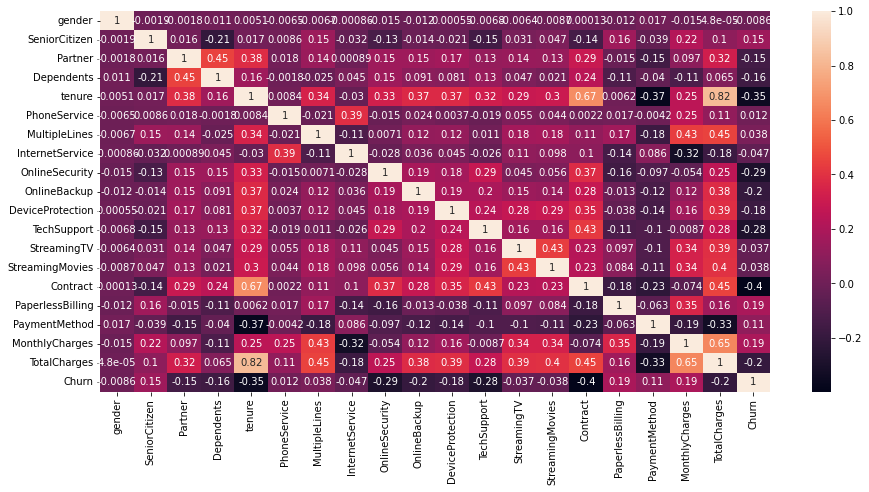

In [151]:
#now lets find out the co relation among the features(multicolinearity) using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

Observations from the heatmap

1.Contract is highly corelated with tenure.

2.Total charges is highly corelated with tenure.

3.Monthly charges and total charges are highly corelated with totalcharges.

Lets plot scatter plots among the above features and analyze the trend.

In [152]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

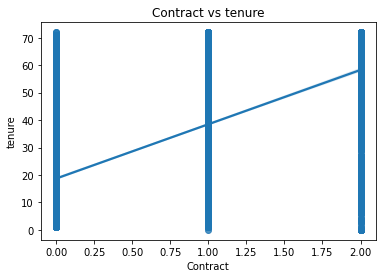

In [156]:
sns.regplot(data.Contract, data.tenure)
plt.xlabel('Contract')
plt.ylabel('tenure')
plt.title('Contract vs tenure')
plt.show()

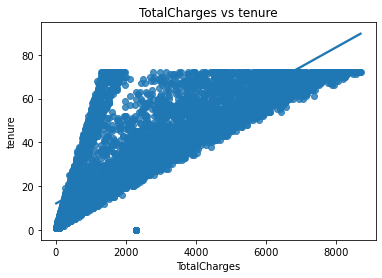

In [157]:
sns.regplot(data.TotalCharges, data.tenure)
plt.xlabel('TotalCharges')
plt.ylabel('tenure')
plt.title('TotalCharges vs tenure')
plt.show()

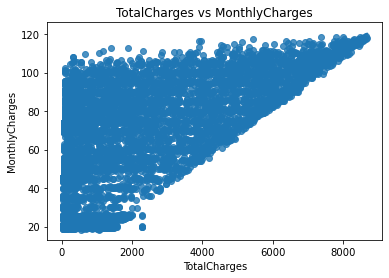

In [160]:
sns.regplot(data.TotalCharges, data.MonthlyCharges)
plt.xlabel('TotalCharges')
plt.ylabel('MonthlyCharges')
plt.title('TotalCharges vs MonthlyCharges')
plt.show()

I have deleted the tenure column from the dataset a it is showing multicolinearity with other features

In [163]:
data=data.drop('tenure', axis=1)

<AxesSubplot:>

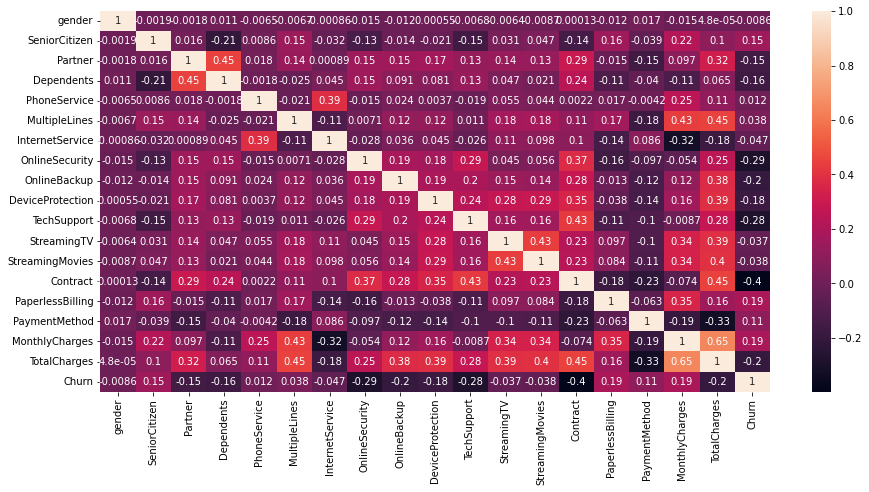

In [164]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

The Heatmap looks good now,the multicolinearity issue is resolved.

In [169]:
#Lets plot some more graphs to have a better understanding of the data 


y=data['Churn']
x=data.drop(columns=['Churn'])

In [170]:
x.shape

(7043, 18)

In [171]:
y.shape

(7043,)

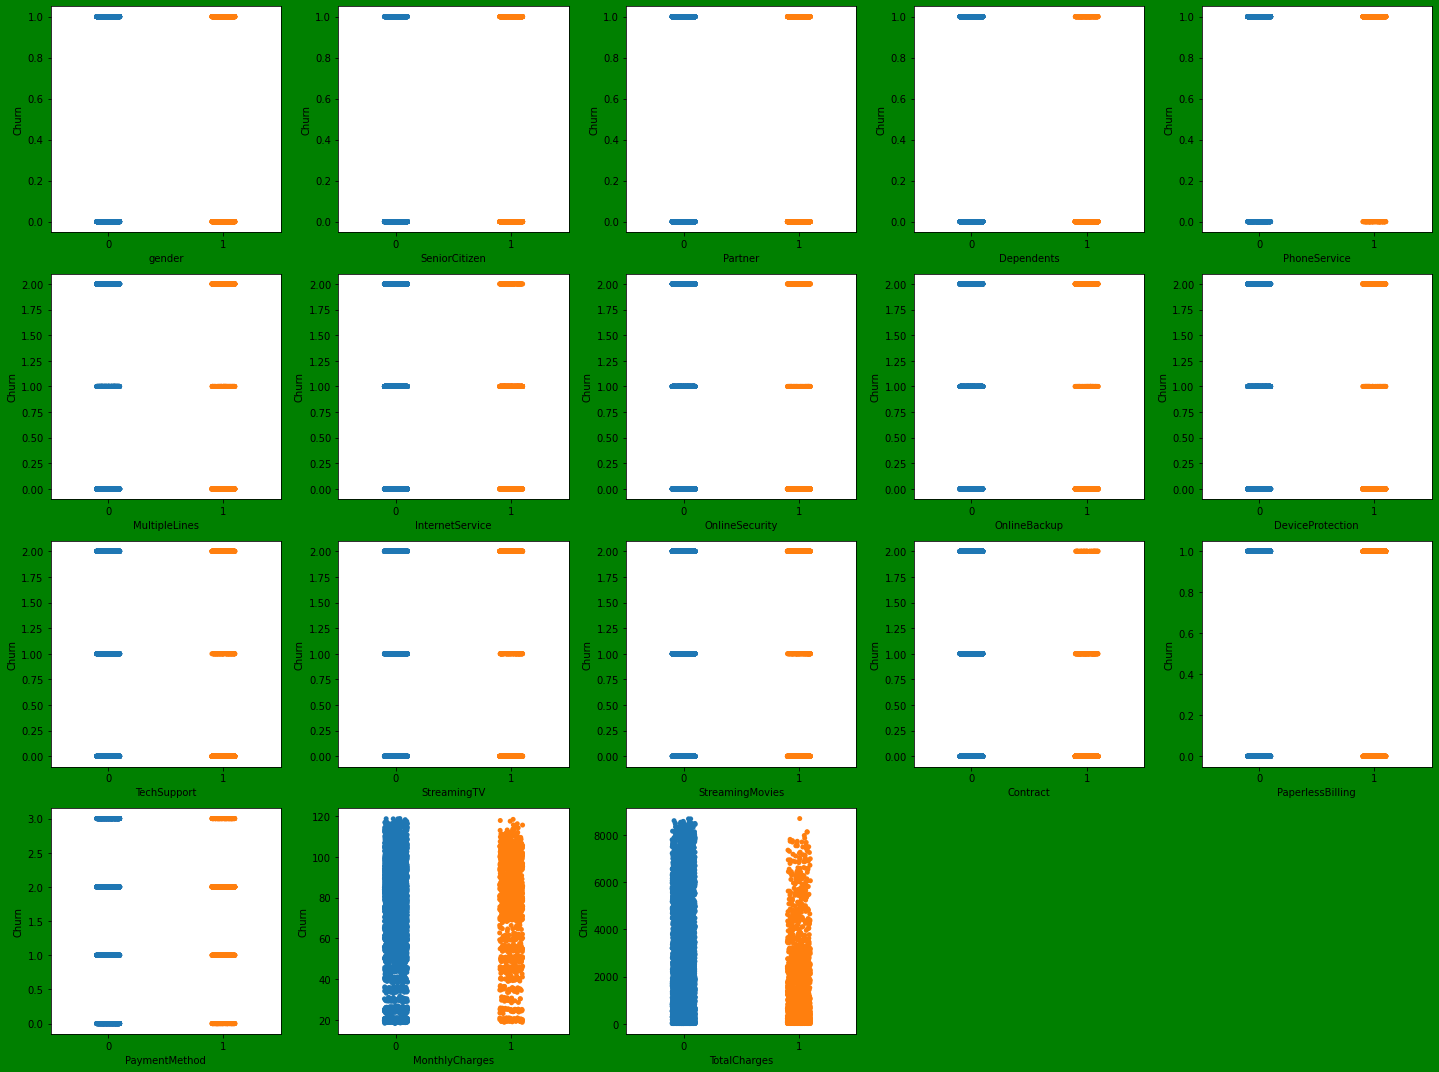

In [172]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Churn',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

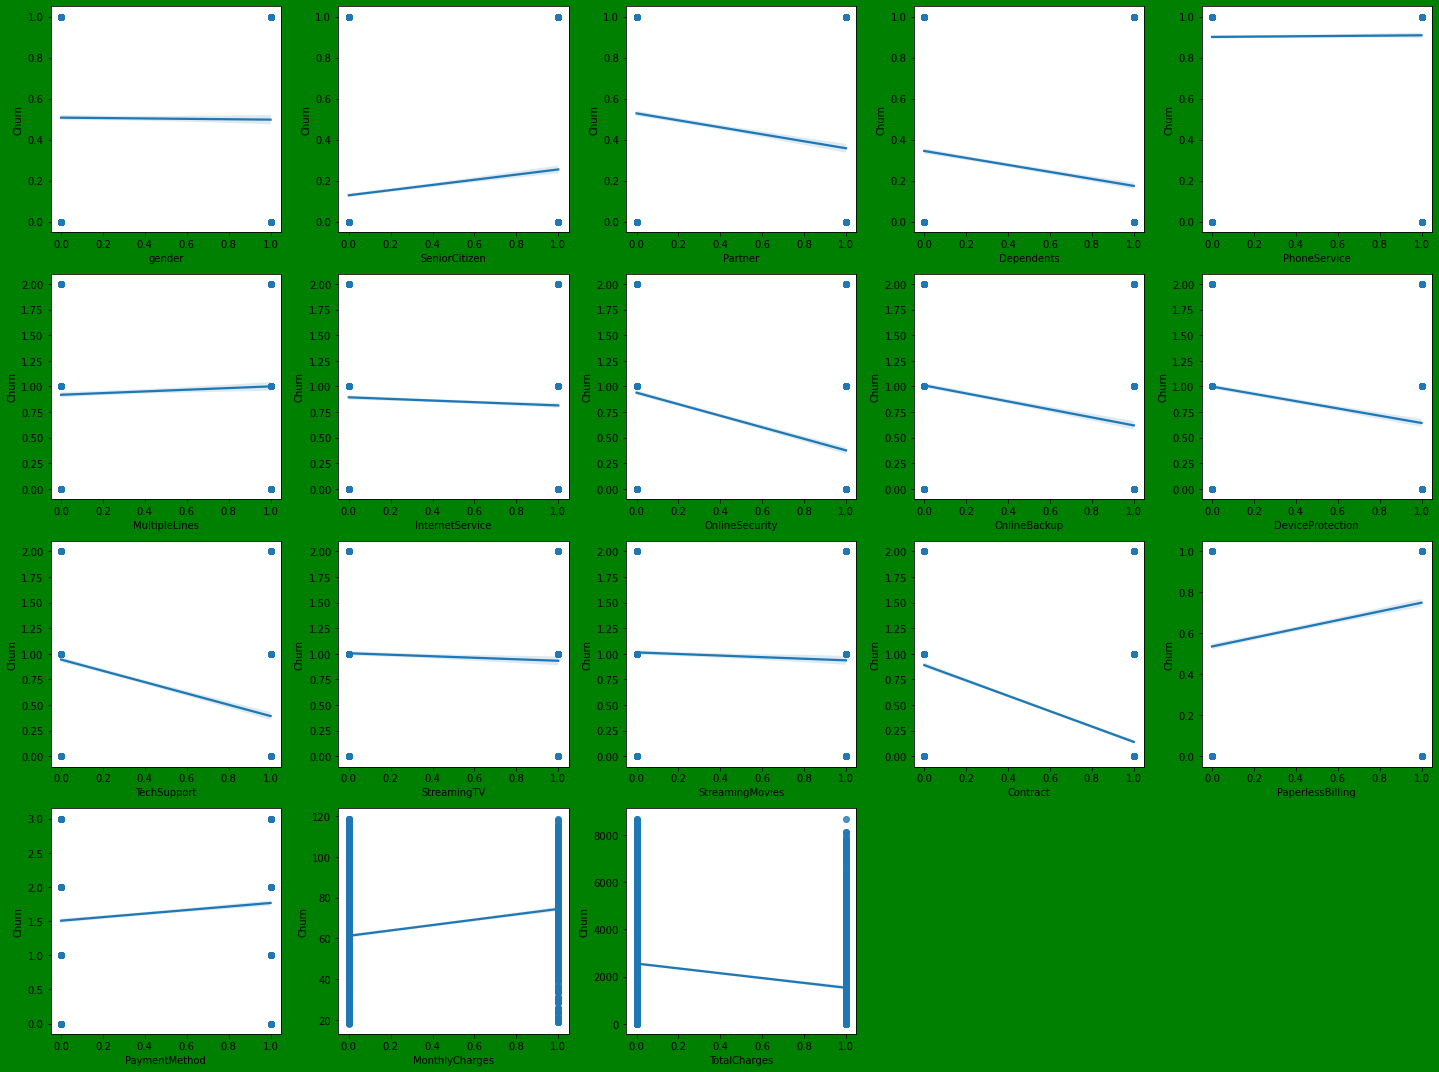

In [173]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Churn',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [174]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [175]:
x_scaled.shape[1]

18

In [176]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF          Features
0   1.001933            gender
1   1.147956     SeniorCitizen
2   1.442544           Partner
3   1.381658        Dependents
4   1.622081      PhoneService
5   1.383347     MultipleLines
6   1.826159   InternetService
7   1.267756    OnlineSecurity
8   1.218530      OnlineBackup
9   1.296507  DeviceProtection
10  1.313962       TechSupport
11  1.446227       StreamingTV
12  1.445486   StreamingMovies
13  2.121357          Contract
14  1.201864  PaperlessBilling
15  1.143296     PaymentMethod
16  3.875109    MonthlyCharges
17  3.953557      TotalCharges

All the features have vif scores less than 10.So we dont need to worry about multicolinearity.

Now as the label has  catagorical data  so this is a Classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

# Building classification models for Churn

In [177]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=700)
y_train.head()


5694    0
1544    0
4560    0
3952    0
3306    0
Name: Churn, dtype: int32

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [179]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier() 
rfc=RandomForestClassifier()   
svm=SVC()                 

In [180]:
models = [lr, knn, dtc, svm, rfc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print (accuracy_score(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print (classification_report(y_test, y_pred))

LogisticRegression()
0.7989778534923339
[[1157  131]
 [ 223  250]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1288
           1       0.66      0.53      0.59       473

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761

KNeighborsClassifier()
0.7563884156729132
[[1095  193]
 [ 236  237]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1288
           1       0.55      0.50      0.52       473

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.68      1761
weighted avg       0.75      0.76      0.75      1761

DecisionTreeClassifier()
0.7223168654173765
[[1046  242]
 [ 247  226]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1288
           1       0.48      0

In [181]:
# Cross validation scores for all models

for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')


Cross Validation Score for  LogisticRegression()  is : 0.7983812862669246
 
Cross Validation Score for  KNeighborsClassifier()  is : 0.7516642488716957
 
Cross Validation Score for  DecisionTreeClassifier()  is : 0.7324989925854287
 
Cross Validation Score for  SVC()  is : 0.7966769422952934
 
Cross Validation Score for  RandomForestClassifier()  is : 0.7884409252095421
 


We have concluded that the LogisticRegression() is the best model based on the accuracy  and Cross validation  scores of all the models. So now lets use LogisticRegression() for further evaluation and lets check whether we can improve the accuracy of the model by using Hyperparameter tuning using GridSearchCV.

In [185]:
from sklearn.model_selection import GridSearchCV
param_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C' : np.logspace(-4, 4, 20),'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], 'max_iter' : [20,40,60,80]}

In [186]:
gridsearch=GridSearchCV(estimator= lr , param_grid=param_grid )

In [187]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [20, 40, 60, 80],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [188]:
gridsearch.best_params_

{'C': 0.03359818286283781,
 'max_iter': 20,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [190]:
lr=LogisticRegression(C=0.03359818286283781,max_iter=20,penalty='l1',solver='liblinear')

In [191]:
lr.fit(x_train,y_train)


LogisticRegression(C=0.03359818286283781, max_iter=20, penalty='l1',
                   solver='liblinear')

In [192]:
data.tail()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
7038       1              0        1           1             1              2   
7039       0              0        1           1             1              2   
7040       0              0        1           1             0              1   
7041       1              1        1           0             1              2   
7042       1              0        0           0             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  
7038              3           84.80       1990.50      0  
7039              1          103.20       7362.90      0  
7040              2           29.60        346.45      0  
7041              3           74.40        306.60      1  
7042              0          105.65       6844.50      0

In [193]:
#prediction of Loan_status 
print('churn is ', lr.predict(scalar.transform([[1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50]])))

churn is  [0]


In [194]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [195]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1171,  117],
       [ 231,  242]], dtype=int64)

In [196]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1288
           1       0.67      0.51      0.58       473

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



The accuracy score has not increased after applying Hyperparameter tuning using GridSearchCV. But the Sum of true negative and false positive has decreased.

In [197]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_scaled,y,cv=10)

array([0.7929078 , 0.80992908, 0.78865248, 0.82386364, 0.77982955,
       0.77840909, 0.79829545, 0.79829545, 0.80255682, 0.80255682])

In [198]:
cross_val_score(LogisticRegression(),x_scaled,y,cv=10).mean()

0.7983812862669246

In [199]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle4'
pickle.dump(lr,open('finalized_model.pickle4','wb'))